# Asg-2


You'll see the tasks enclosed as follows.

---> Question... <---

...task ...
 
---> End... <---

In [1]:
from jove.DotBashers import *
from jove.Def_md2mc import *
from jove.Def_DFA   import *
from jove.LangDef   import *
from jove.Def_RE2NFA   import *
from jove.Def_NFA   import *
from jove.Def_NFA2RE    import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

Generating LALR tables


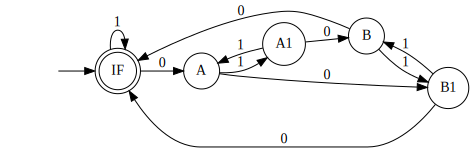

In [2]:
Tz_bloated = md2mc('''DFA
IF : 0 -> A
A : 0 -> B1
B : 0 -> IF
IF: 1 -> IF
A : 1 -> A1
B : 1 -> B1
A1: 0 -> B
A1 : 1 -> A
B1 : 0 -> IF
B1 : 1 -> B
''')
dotObj_dfa(Tz_bloated)

Generating LALR tables


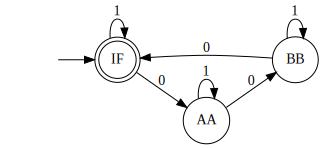

In [3]:
#My generated minimization

Tz_min = md2mc('''DFA
IF : 0 -> AA
IF : 1 -> IF
AA : 0 -> BB
AA : 1 -> AA
BB : 0 -> IF
BB : 1 -> BB
''')

dotObj_dfa(Tz_min)

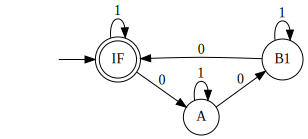

In [4]:
#And the automated solution

dotObj_dfa(min_dfa(Tz_bloated))

--> Solve Q3 (b) below <--


Write about four bulleted sentences, clearly explaining how your hand-minimization in 3(a) matches with the automated solution here

* Both DFAs have the same number of final, initial, and other states
* All deltas whithin the DFAs are identical
* Both DFAs will map the same language
* Aside from state names, the generated graphs look exactly the same

--> End  <--

--> Do the Jove part of Question 3(c) here <--

The hand-solution for 3(c) is to be entered into the PDF submission.

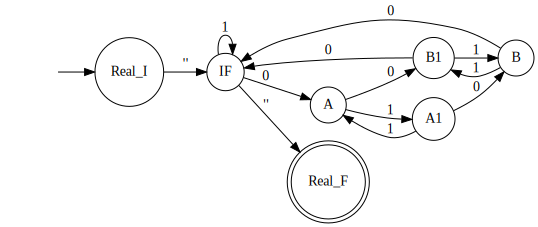

In [5]:
Gbloat = mk_gnfa_from_D(Tz_bloated)
dotObj_nfa(Gbloat)

In [6]:
(Gfinal, DO, RE) = del_gnfa_states(Gbloat, ['A', 'A1', 'B', 'B1', 'IF'])

**** Eliminating state A ****
**** Eliminating state A1 ****
**** Eliminating state B ****
**** Eliminating state B1 ****
**** Eliminating state IF ****


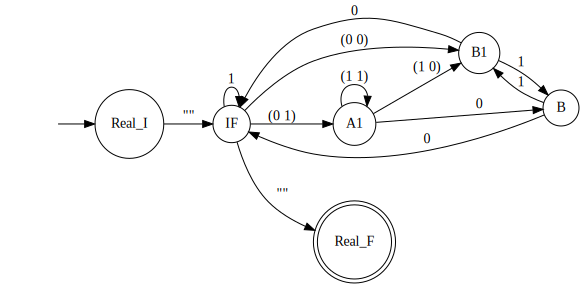

In [7]:
DO[1]

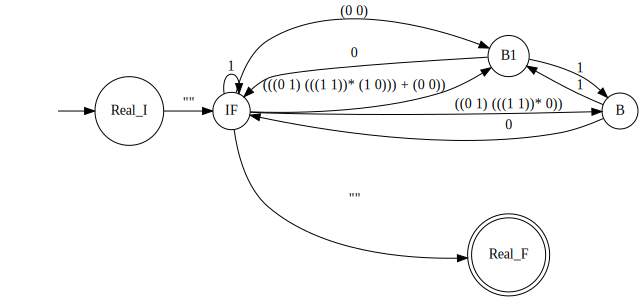

In [8]:
DO[2]

...more such commands...

In [9]:
RE

'(((((((((0 1) (((1 1))* 0)) 1) + ((((0 1) (((1 1))* (1 0))) + (0 0)) + (0 0))) + ((((0 1) (((1 1))* (1 0))) + (0 0)) + (0 0))) (((1 1))* (((1 0) + 0) + 0))) + (((((0 1) (((1 1))* 0)) 0) + 1) + 1)) + (((((0 1) (((1 1))* 0)) 0) + 1) + 1)))*'

Write about four bullets comparing the hand-elimination of states (and the resulting REs) and what differences you may notice in the Jove-obtained NFA to RE results

* Aside from the placement of states, my GNFAs are identical to those generated by Jove
* The deletion of A gave me the same patterns as Jove generated
* The deletion of A1 gave me the same patterns from IF -> B and IF -> B1 as Jove, as well as all the other ones

--> End <--

I may have checked for more stages of conversion. The student is required to submit two steps of elimination.


--> Question 3(d)'s work below <--

In [10]:
RE

'(((((((((0 1) (((1 1))* 0)) 1) + ((((0 1) (((1 1))* (1 0))) + (0 0)) + (0 0))) + ((((0 1) (((1 1))* (1 0))) + (0 0)) + (0 0))) (((1 1))* (((1 0) + 0) + 0))) + (((((0 1) (((1 1))* 0)) 0) + 1) + 1)) + (((((0 1) (((1 1))* 0)) 0) + 1) + 1)))*'

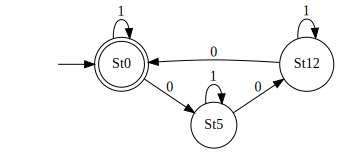

In [11]:
# In this code cell
# ...produce a minimized DFA in one line of Jove command, from RE...
newMinDfa = min_dfa(nfa2dfa(re2nfa(RE)))
dotObj_dfa(newMinDfa)

Write down four bullets commenting on how this minimized DFA compares with the minimal DFAs obtained earlier.

* Other than the state names this DFA is exactly the same as the ones generated earlier
* All three states point to themselveas via 1
* All three states also create a rotation with 0
* The graphs are once again exactly the same

--> End <--

 --> Solution for 4(a) <--

Generating LALR tables


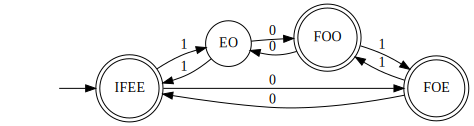

In [12]:
DFAOdd0OREven1 = min_dfa(md2mc(
'''DFA
!! States: odd 0's even 1's (final)(FOE), odd 0's odd 1's (final)(FOO), even 0's even 1's (initial/final)(IFEE), even 0's odd 1's (EO)
IFEE : 0 -> FOE
IFEE : 1 -> EO
FOE : 0 -> IFEE
FOE : 1 -> FOO
FOO : 0 -> EO
FOO : 1 -> FOE
EO : 0 -> FOO
EO : 1 -> IFEE
'''))
dotObj_dfa(DFAOdd0OREven1)

Construct the requested DFA, obtaining its diagram. 

Write four bullets documenting this DFA

* There are 4 states
* Every state has a pair where repeated input of the same letter will alternate between the two
* These pair states form a loop
* An input of (01)* or (10)* will navigate the loop counter clockwise and clockwise respectively 

--> End <---


--> Solution for 4(b) <--

Generating LALR tables


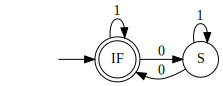

In [13]:
DFAEven0 = md2mc(
'''DFA
!! DFA for an even number of 0's
IF : 0 -> S
IF : 1 -> IF
S : 0 -> IF
S : 1 -> S
''')
dotObj_dfa(DFAEven0)

Generating LALR tables


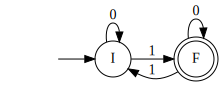

In [14]:
DFAOdd1 = md2mc(
'''DFA
!! DFA for an odd number of 1's
I : 0 -> I
I : 1 -> F
F : 0 -> F
F : 1 -> I
''')
dotObj_dfa(DFAOdd1)

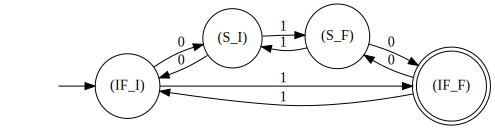

In [15]:
DFAIntersection = intersect_dfa(DFAEven0, DFAOdd1)
dotObj_dfa(DFAIntersection)

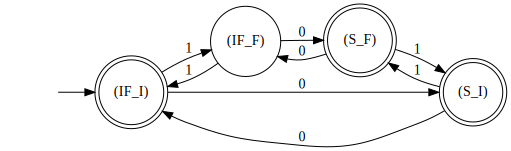

In [16]:
DFAOdd0OREven1Alt = comp_dfa(DFAIntersection)
dotObj_dfa(DFAOdd0OREven1Alt)

Construct the requested DFA, obtaining its diagram. 

Write four bullets documenting this DFA

* The DFAs for even 0's and odd 1's are both very simple, alternating between an accepting and not accepting state
* The intersection creates a DFA that appears to be the same as the one created in 4a
* This final DFA has the same number of initial and final states as the one from 4a
* This DFA and the one from 4a should be language equivalent as well as isomorphic

--> End <---


--> Solution for 4(c) <--

In [17]:
iso_dfa(DFAOdd0OREven1, DFAOdd0OREven1Alt)

True

Show the isomorphism; write comments on your work below in the bullets.

* Both DFA have the same number of states
* Both DFA are language equivalent
* These are the two requirements for isomorphism

--> End <---


In [18]:
N5 = md2mc('''NFA
I : 0|1 -> I
I : ''  -> B,C
B : 0   -> D
D : 0|1 -> F
D : ''  -> C
C : 1   -> F
''')

Generating LALR tables


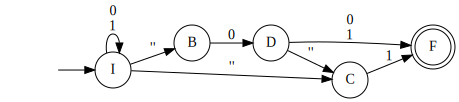

In [19]:
dotObj_nfa(N5, FuseEdges=True)

Generating LALR tables


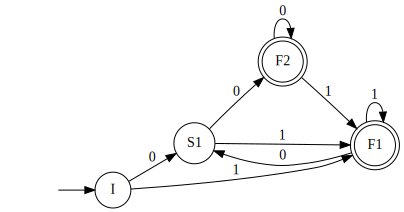

In [20]:
HD5 = md2mc('''DFA
I : 0 -> S1 !! I = IBC, S1 = IBCD, F1 = IBCF, F2 = IBCDF
I : 1 -> F1
S1 : 0 -> F2
S1 : 1 -> F1
F1 : 0 -> S1
F1 : 1 -> F1
F2 : 0 -> F2
F2 : 1 -> F1
''')
dotObj_dfa(HD5)

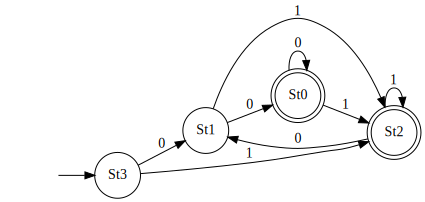

In [21]:
JD5 = min_dfa(nfa2dfa(N5))
dotObj_dfa(JD5)

--> 5(b)<--
The JD5 machine matches my HD5 machine perfectly. It has the same number of state, types of states, and transitions between states. 
--> end <--